# Predicting Flight Arrival Delays
### By Nick Palacio

## Constants

In [ ]:
%load_ext autoreload
%autoreload 2

In [39]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [40]:
flightDataFile = './Flight Delays Data.csv'
weatherDataFile = './Weather Data.csv'

## Without Weather Data

### Load Flight Data

In [41]:
flightData = pd.read_csv(flightDataFile)
flightData

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0
5,2013,4,19,5,DL,10397,15016,1726,-1.0,0.0,1818,-19.0,0.0,0.0
6,2013,4,19,5,DL,15016,10397,1900,0.0,0.0,2133,-1.0,0.0,0.0
7,2013,4,19,5,DL,10397,14869,2145,15.0,1.0,2356,24.0,1.0,0.0
8,2013,4,19,5,DL,10397,10423,2157,33.0,1.0,2333,34.0,1.0,0.0
9,2013,4,19,5,DL,11278,10397,1900,323.0,1.0,2055,322.0,1.0,0.0


### Clean Flight Data

#### Missing Data

In [42]:
utils.FillInMissingNumericValues(flightData,'DepDelay',0)
utils.FillInMissingNumericValues(flightData,'ArrDelay',0)

Filled in 27444 missing values for DepDelay
Filled in 29033 missing values for ArrDelay


#### Duplicate Rows

In [43]:
utils.DropDuplicates(flightData,['Year','Month','DayofMonth','Carrier','OriginAirportID','DestAirportID','CRSDepTime','CRSArrTime'])

Deleted 21 duplicate rows


#### Filter Columns

In [44]:
filteredFlightData = utils.FilterColumns(flightData, ['Year','Month','DayofMonth','DayOfWeek','Carrier','OriginAirportID','DestAirportID','CRSDepTime','DepDelay'])
filteredFlightData

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay
0,2013,4,19,5,DL,11433,13303,837,-3.0
1,2013,4,19,5,DL,14869,12478,1705,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0
3,2013,4,19,5,DL,15016,11433,1630,28.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0
5,2013,4,19,5,DL,10397,15016,1726,-1.0
6,2013,4,19,5,DL,15016,10397,1900,0.0
7,2013,4,19,5,DL,10397,14869,2145,15.0
8,2013,4,19,5,DL,10397,10423,2157,33.0
9,2013,4,19,5,DL,11278,10397,1900,323.0


#### Handle Categorical Data

In [45]:
pristineFlightData = pd.get_dummies(filteredFlightData,columns=['Carrier','OriginAirportID','DestAirportID'])

### Analyze Flight Data Features

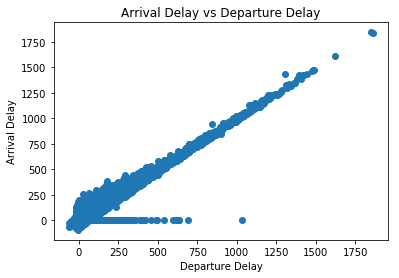

In [46]:
arrDelayData = flightData['ArrDelay']
depDelayData = flightData['DepDelay']
plt.scatter(depDelayData, arrDelayData)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

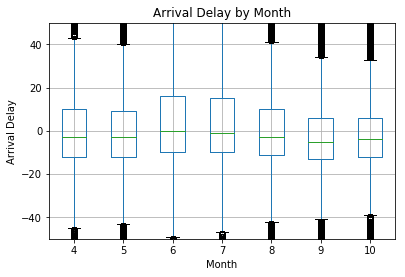

In [47]:
ax = flightData.boxplot('ArrDelay',by='Month',return_type=None)
ax.set_ylim(-50,50)
plt.axes(ax)
plt.ylabel('Arrival Delay')
plt.xlabel('Month')
plt.title('Arrival Delay by Month')
plt.suptitle('')
plt.show()

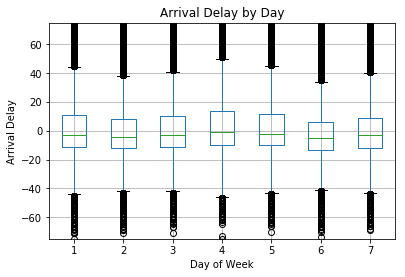

In [48]:
ax = flightData.boxplot('ArrDelay',by='DayOfWeek',return_type=None)
ax.set_ylim(-75,75)
plt.axes(ax)
plt.ylabel('Arrival Delay')
plt.xlabel('Day of Week')
plt.title('Arrival Delay by Day')
plt.suptitle('')
plt.show()

### Run Algorithms

In [49]:
mask = np.random.rand(len(pristineFlightData)) < .7
trainingDataX = pristineFlightData[mask]
testingDataX = pristineFlightData[~mask]
labelData = flightData.filter(items=['ArrDelay'])
trainingLabelData = labelData[mask]
testingLabelData = labelData[~mask]

In [50]:
comparisonDict = {
    'MeanAbsErr': [],
    'MeanSquErr': [],
    'RootMeanSquErr': []
}

#### Linear Regression

In [51]:
linRegrModel = LinearRegression()
linRegrModel.fit(trainingDataX,trainingLabelData)
predictedLRLabelData = linRegrModel.predict(testingDataX)

In [52]:
comparisonDict = utils.UpdateComparisonDict(comparisonDict, testingLabelData, predictedLRLabelData)
comparisonDict

{'MeanAbsErr': [8.800487463365158],
 'MeanSquErr': [167.32411421606542],
 'RootMeanSquErr': [12.935382260144669]}

#### Decision Tree Regression

In [53]:
dtModel = tree.DecisionTreeRegressor()
dtModel.fit(trainingDataX,trainingLabelData)
predictedDTLabelData = dtModel.predict(testingDataX)

In [54]:
comparisonDict = utils.UpdateComparisonDict(comparisonDict, testingLabelData, predictedDTLabelData)

### Comparison of Algorithms Without Weather Data

In [55]:
algorithms = ('LR', 'DT')
y_pos = np.arange(len(algorithms))

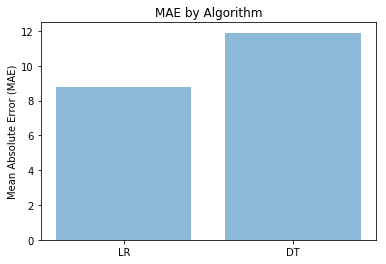

In [56]:
plt.bar(y_pos, comparisonDict['MeanAbsErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE by Algorithm')
plt.show()

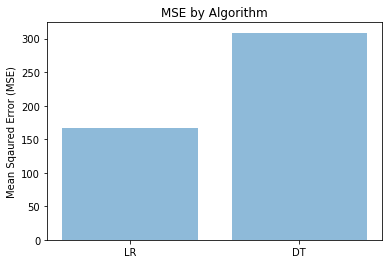

In [57]:
plt.bar(y_pos, comparisonDict['MeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Sqaured Error (MSE)')
plt.title('MSE by Algorithm')
plt.show()

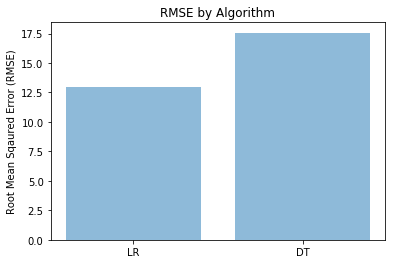

In [58]:
plt.bar(y_pos, comparisonDict['RootMeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Root Mean Sqaured Error (RMSE)')
plt.title('RMSE by Algorithm')
plt.show()

## With Weather Data

### Load Weather Data

In [59]:
weatherData = pd.read_csv(weatherDataFile)

C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clean Weather Data

#### Missing Data

In [ ]:
colInfoDictArr = [
    {'name': 'Visibility','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'DryBulbCelsius','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'WetBulbCelsius','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'DewPointCelsius','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'RelativeHumidity','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'WindSpeed','valuesToHandle': ['M','  '],'defaultValue': 0},
    {'name': 'StationPressure','valuesToHandle': ['M'],'defaultValue': 0}
]
processedWeatherData = utils.ConvertColumnsToNumeric(weatherData, colInfoDictArr)
processedWeatherData

In [ ]:
filteredFlightData['CRSDepHour'] = flightData.apply(lambda row: utils.CalculateFlightDataHour(row),axis=1)
processedWeatherData = utils.UpdateWeatherDataTimeFields(weatherData)

#### Filter Columns

In [ ]:
processedWeatherData = utils.FilterColumns(processedWeatherData, ['AirportID','Year','Month','Day','Time','Hour','TimeZone','Visibility','DryBulbCelsius','WetBulbCelsius','DewPointCelsius','RelativeHumidity','WindSpeed','StationPressure'])
processedWeatherData

#### Drop Duplicate Weather Records

In [ ]:
utils.DropDuplicates(processedWeatherData, ['AirportID','Year','Month','Day','Hour'])

### Join Flight Data with Weather Data

In [ ]:
mergedData = filteredFlightData.merge(processedWeatherData,how='left', left_on=['OriginAirportID','Year','Month','DayofMonth','CRSDepHour'], right_on=['AirportID','Year','Month','Day','Hour'])
mergedData
# mergedData.columns

#### Drop Columns

In [ ]:
columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier','OriginAirportID', 'DestAirportID', 'CRSDepTime', 'DepDelay','CRSDepHour','ArrDelay','TimeZone','Visibility','DryBulbCelsius','WetBulbCelsius','DewPointCelsius','RelativeHumidity','WindSpeed','StationPressure']
mergedData = utils.FilterColumns(mergedData, columns)
utils.FillInMissingNumericValues(mergedData, 'TimeZone',0)
utils.FillInMissingNumericValues(mergedData, 'Visibility',0)
utils.FillInMissingNumericValues(mergedData, 'DryBulbCelsius',0)
utils.FillInMissingNumericValues(mergedData, 'WetBulbCelsius',0)
utils.FillInMissingNumericValues(mergedData, 'DewPointCelsius',0)
utils.FillInMissingNumericValues(mergedData, 'RelativeHumidity',0)
utils.FillInMissingNumericValues(mergedData, 'WindSpeed',0)
utils.FillInMissingNumericValues(mergedData, 'StationPressure',0)
mergedData

#### Handle Categorical Data

In [ ]:
mergedData = pd.get_dummies(mergedData,columns=['Carrier','OriginAirportID','DestAirportID','TimeZone'])
mergedData

### Run Algorithms With Weather Data

In [ ]:
mask = np.random.rand(len(mergedData)) < .7
trainingDataXWW = mergedData[mask]
testingDataXWW = mergedData[~mask]
labelDataWW = flightData.filter(items=['ArrDelay'])
trainingLabelDataWW = labelDataWW[mask]
testingLabelDataWW = labelDataWW[~mask]

In [ ]:
comparisonDictWW = {
    'MeanAbsErr': [],
    'MeanSquErr': [],
    'RootMeanSquErr': []
}

#### Linear Regression With Weather Data

In [ ]:
linRegrModelWithWeather = LinearRegression()
linRegrModelWithWeather.fit(trainingDataXWW,trainingLabelDataWW)
predictedLRWWLabelData = linRegrModelWithWeather.predict(testingDataXWW)

In [ ]:
comparisonDictWW = utils.UpdateComparisonDict(comparisonDictWW, testingLabelDataWW, predictedLRWWLabelData)
comparisonDictWW

#### Decision Tree Regression With Weather Data

In [ ]:
dtModelWithWeather = tree.DecisionTreeRegressor()
dtModelWithWeather.fit(trainingDataXWW,trainingLabelDataWW)
predictedDTWWLabelData = dtModelWithWeather.predict(testingDataXWW)

In [ ]:
comparisonDictWW = utils.UpdateComparisonDict(comparisonDictWW, testingLabelDataWW, predictedDTWWLabelData)
comparisonDictWW

#### Comparison of Algorithms With Weather Data

In [ ]:
algorithms = ('LRWW', 'DTWW')
y_pos = np.arange(len(algorithms))

In [ ]:
plt.bar(y_pos, comparisonDictWW['MeanAbsErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE by Algorithm')

In [ ]:
plt.bar(y_pos, comparisonDictWW['MeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Sqaured Error (MSE)')
plt.title('MSE by Algorithm')

In [ ]:
plt.bar(y_pos, comparisonDictWW['RootMeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Root Mean Sqaured Error (RMSE)')
plt.title('RMSE by Algorithm')